In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from scipy.io import arff
RANDOM_STATE = 1234

In [2]:
df = arff.loadarff("D:/githubrepo/ML_models/Work/rice/Data/Rice_Cammeo_Osmancik.arff")
df = pd.DataFrame(df[0])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [3]:
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [4]:
df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [5]:
X = df.drop(['Class'], axis=1)

In [6]:
df['Class'][1]
df['Class'] = (df['Class'] == df['Class'][0]).astype(int)
# 1: Cammeo 0: Osmancik

In [7]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = df['Class']

In [8]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.6, random_state=RANDOM_STATE)
X_test, X_cv, y_test, y_cv = train_test_split(X_, y_, train_size=0.5, random_state=RANDOM_STATE)
del X_, y_

print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} y_test: {y_test.shape}")
print(f"X_cv: {X_cv.shape} y_cv: {y_cv.shape}")

X_train: (2286, 7) y_train: (2286,)
X_test: (762, 7) y_test: (762,)
X_cv: (762, 7) y_cv: (762,)


In [9]:
corr = df.corr()

<Axes: >

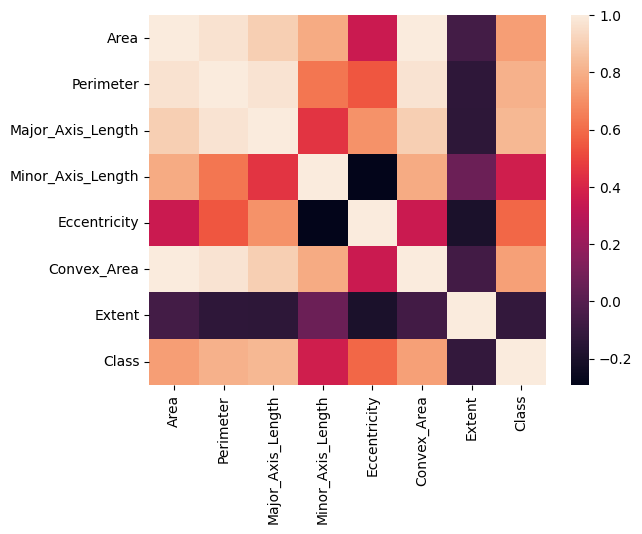

In [10]:
sns.heatmap(corr)

In [12]:
model = XGBClassifier(random_state=RANDOM_STATE)

param_grid = {"n_estimators": [5, 10, 20, 40, 50, 80, 120, 200],
              "max_depth": [1, 5, 10, 15, 30, 60],
              "learning_rate": [1e-5, 1e-4, 1e-3, 1e-2],
              "gamma": [0.001, 0.01, 0.1, 1]}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          refit='accuracy',
                          cv=5, 
                          verbose=0,
                          return_train_score=True,
                          )

grid_result = grid_model.fit(X_train, y_train, verbose=0)

In [13]:
print(f"Best Parameter: {grid_model.best_params_}")
print(f"Best Accuracy: {grid_model.best_score_}")

Best Parameter: {'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 200}
Best Accuracy: 0.9282562372793899


In [14]:
print(f"Test Accuracy: {grid_model.score(X_test, y_test)}")

Test Accuracy: 0.9146981627296588


In [15]:
result_df = pd.DataFrame(grid_model.cv_results_)
result_df = result_df.sort_values("rank_test_score")
result_df.to_csv('xgboost_parameters.csv')